# Experiment 1 – Baseline RBM training and reconstruction
Train a small Bernoulli RBM on the built-in scikit-learn digits dataset.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from rbm_utils import (
    load_digits_data,
    rbm_cd1_train,
    rbm_reconstruct,
    hamming_error,
    save_model,
)

np.random.seed(0)
plt.rcParams["figure.figsize"] = (12, 5)


In [2]:

target_size = (14, 14)
nv = target_size[0] * target_size[1]
nh = 50
epochs = 50
batch_size = 100
lr = 0.1
weight_decay = 1e-4
threshold = 0.5

X_train, X_test, target_size = load_digits_data(
    target_size=target_size, threshold=threshold, test_size=0.2, seed=0
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, visible units: {nv}")


Train shape: (1437, 196), Test shape: (360, 196), visible units: 196


In [3]:

params, train_errors, test_errors = rbm_cd1_train(
    X_train,
    X_test,
    nv=nv,
    nh=nh,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    weight_decay=weight_decay,
    seed=0,
)

model_path = Path("models/rbm_digits_50.npz")
save_model(params, target_size, str(model_path))
print(f"Saved model to {model_path}")


Epoch 1/50 - train err 0.2249 - test err 0.2275
Epoch 2/50 - train err 0.2197 - test err 0.2230
Epoch 3/50 - train err 0.2134 - test err 0.2154
Epoch 4/50 - train err 0.1880 - test err 0.1899
Epoch 5/50 - train err 0.1657 - test err 0.1683
Epoch 6/50 - train err 0.1485 - test err 0.1514
Epoch 7/50 - train err 0.1412 - test err 0.1433
Epoch 8/50 - train err 0.1343 - test err 0.1398
Epoch 9/50 - train err 0.1302 - test err 0.1337
Epoch 10/50 - train err 0.1241 - test err 0.1317
Epoch 11/50 - train err 0.1193 - test err 0.1238
Epoch 12/50 - train err 0.1160 - test err 0.1224
Epoch 13/50 - train err 0.1124 - test err 0.1170
Epoch 14/50 - train err 0.1092 - test err 0.1136
Epoch 15/50 - train err 0.1057 - test err 0.1106
Epoch 16/50 - train err 0.1033 - test err 0.1085
Epoch 17/50 - train err 0.1022 - test err 0.1066
Epoch 18/50 - train err 0.0994 - test err 0.1040
Epoch 19/50 - train err 0.0983 - test err 0.1030
Epoch 20/50 - train err 0.0971 - test err 0.1014
Epoch 21/50 - train err 0.094

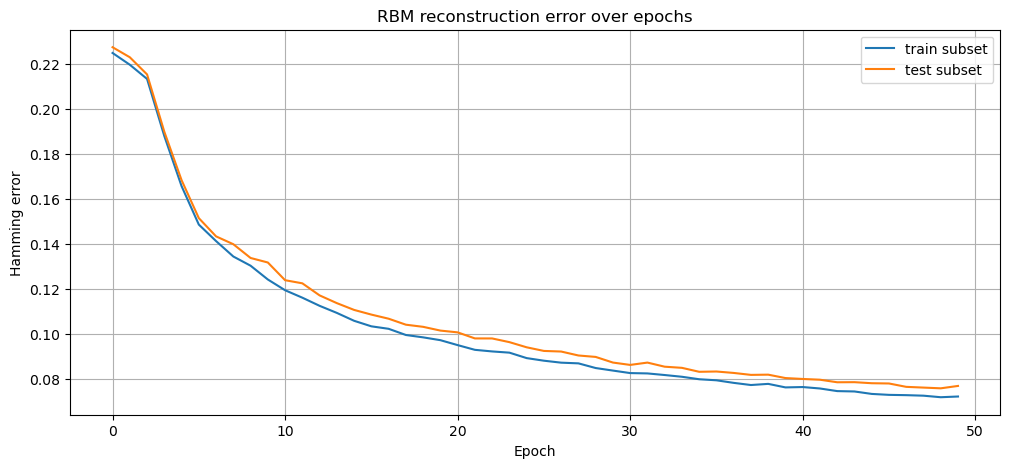

In [4]:

plt.plot(train_errors, label="train subset")
plt.plot(test_errors, label="test subset")
plt.xlabel("Epoch")
plt.ylabel("Hamming error")
plt.title("RBM reconstruction error over epochs")
plt.legend()
plt.grid(True)
plt.show()


Average test reconstruction error: 0.0685


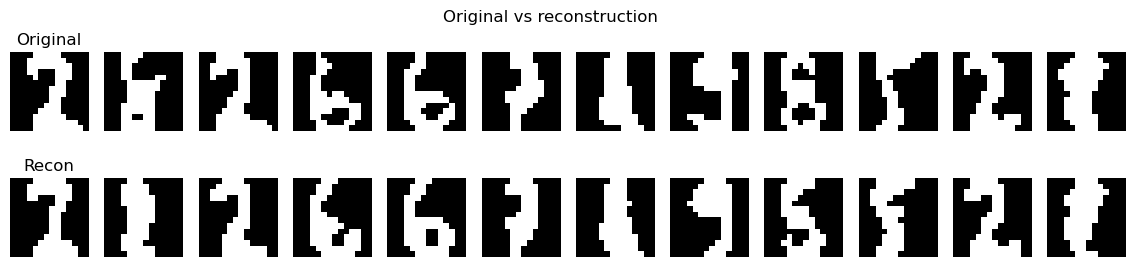

In [5]:

num_show = 12
batch = X_test[:num_show]
recon = rbm_reconstruct(batch, params.W, params.b, params.c)
err = hamming_error(batch, recon)
print(f"Average test reconstruction error: {err:.4f}")

fig, axes = plt.subplots(2, num_show, figsize=(num_show * 1.2, 3))
for i in range(num_show):
    axes[0, i].imshow(batch[i].reshape(target_size), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(recon[i].reshape(target_size), cmap="gray")
    axes[1, i].axis("off")
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Recon")
plt.suptitle("Original vs reconstruction")
plt.show()
